In [7]:
import numpy as np
import pandas as pd
import glob, os
import itertools
import matplotlib.image as mpimg
import cv2
import pickle

import classifier

%matplotlib inline
import matplotlib.pyplot as plt

In [8]:
file_list_bad = sorted(glob.glob('/home/ubuntu/mynotebooks/yolo/validation/bad/*.jpg'))
file_list_good = sorted(glob.glob('/home/ubuntu/mynotebooks/yolo/validation/good/*.jpg'))

In [9]:
# net_main_1, meta_main_1 = classifier.load_net("/data1/yolo/model/yolo-obj.cfg", "/data1/yolo/model/weights/backup.1719.strict/yolo-obj_4368.weights", "/data1/yolo/model/obj.data.1719.strict")
# detections_bad = [classifier.detect(net_main_1, meta_main_1, cv2.imread(f), thresh=0.25) for f in file_list_bad]
# detections_good = [classifier.detect(net_main_1, meta_main_1, cv2.imread(f), thresh=0.25) for f in file_list_good]

# with open('detections.pkl', 'wb') as f:
#     pickle.dump((detections_bad, detections_good), f)

(detections_bad, detections_good) = pickle.load( open( "detections.pkl", "rb" ) )

In [10]:
from functools import reduce
detections_bad = reduce(lambda x, y: x+y, detections_bad)
detections_good = reduce(lambda x, y: x+y, detections_good)

df_good = pd.concat((pd.DataFrame(data=[d[1] for d in detections_good], columns=['p']), pd.DataFrame(data=[d[2] for d in detections_good], columns=['x', 'y', 'w', 'h'])), axis=1)
df_bad = pd.concat((pd.DataFrame(data=[d[1] for d in detections_bad], columns=['p']), pd.DataFrame(data=[d[2] for d in detections_bad], columns=['x', 'y', 'w', 'h'])), axis=1)


In [5]:
file_list = sorted(glob.glob('/tmp/604169989/*.jpg'))
detections = [classifier.detect(net_main_1, meta_main_1, cv2.imread(f), thresh=0.1) for f in file_list]

NameError: name 'net_main_1' is not defined

In [17]:
from functools import reduce
first_60s = reduce(lambda x, y: x+y, detections[:60])
df = pd.concat((pd.DataFrame(data=[d[1] for d in first_60s], columns=['p']), pd.DataFrame(data=[d[2] for d in first_60s], columns=['x', 'y', 'w', 'h'])), axis=1)

from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(df)

from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X_std)
plt.scatter(Y_sklearn[:,0], Y_sklearn[:,1])

NameError: name 'detections' is not defined

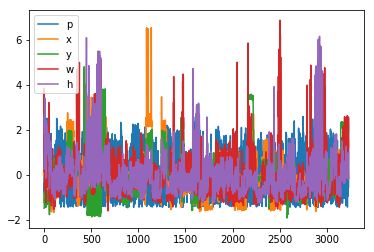

In [85]:
from sklearn.preprocessing import StandardScaler
df = pd.DataFrame(StandardScaler().fit_transform(df_bad), index=df_bad.index, columns=df_bad.columns)
df.plot()

#### Plot for all "bad" frames along the time line

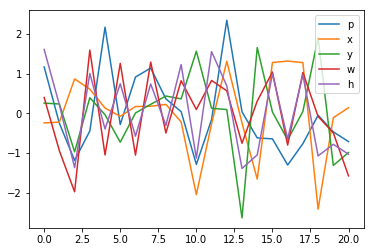

In [77]:
from sklearn.preprocessing import StandardScaler
df = pd.DataFrame(StandardScaler().fit_transform(df_good), index=df_good.index, columns=df_good.columns)
df.plot()

### PCA

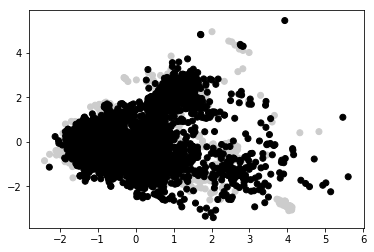

In [12]:
df = pd.DataFrame(np.vstack((df_good.values, df_bad.values)), columns=df_good.columns)

from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(df)

from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
pca_matrix = sklearn_pca.fit(X_std)
Y_sklearn = pca_matrix.transform(X_std)

colors = np.hstack((np.repeat(0, df_good.values.shape[0]), np.repeat(1, df_bad.values.shape[0])))
plt.scatter(Y_sklearn[:,0], Y_sklearn[:,1], c=colors, cmap=plt.cm.get_cmap('nipy_spectral_r', 10))

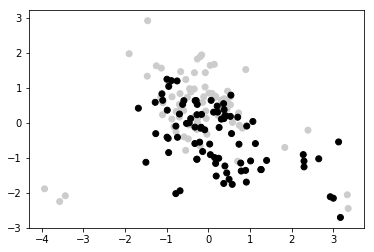

In [16]:
file_list_bad = sorted(glob.glob('/home/ubuntu/mynotebooks/yolo/validation/bad/662036879-*.jpg'))
file_list_good = sorted(glob.glob('/home/ubuntu/mynotebooks/yolo/validation/good/662036879-*.jpg'))
net_main_1, meta_main_1 = classifier.load_net("/data1/yolo/model/yolo-obj.cfg", "/data1/yolo/model/weights/backup.1719.strict/yolo-obj_4368.weights", "/data1/yolo/model/obj.data.1719.strict")
detections_bad = [classifier.detect(net_main_1, meta_main_1, cv2.imread(f), thresh=0.25) for f in file_list_bad]
detections_good = [classifier.detect(net_main_1, meta_main_1, cv2.imread(f), thresh=0.25) for f in file_list_good]

from functools import reduce
detections_bad = reduce(lambda x, y: x+y, detections_bad)
detections_good = reduce(lambda x, y: x+y, detections_good)
df_good = pd.concat((pd.DataFrame(data=[d[1] for d in detections_good], columns=['p']), pd.DataFrame(data=[d[2] for d in detections_good], columns=['x', 'y', 'w', 'h'])), axis=1)
df_bad = pd.concat((pd.DataFrame(data=[d[1] for d in detections_bad], columns=['p']), pd.DataFrame(data=[d[2] for d in detections_bad], columns=['x', 'y', 'w', 'h'])), axis=1)

df = pd.DataFrame(np.vstack((df_good.values, df_bad.values)), columns=df_good.columns)

from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(df)

Y_sklearn = pca_matrix.transform(X_std)

colors = np.hstack((np.repeat(0, df_good.values.shape[0]), np.repeat(1, df_bad.values.shape[0])))
plt.scatter(Y_sklearn[:,0], Y_sklearn[:,1], c=colors, cmap=plt.cm.get_cmap('nipy_spectral_r', 10))